# **Project Name**    - **Cardiovascular Risk Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual (Ashok  Kumar)

# **Project Summary -**

The goal of this project was to leverage machine learning techniques to predict the 10-year likelihood of coronary heart disease (CHD) in patients. The project utilized data from the long-term Framingham Heart Study, which provided information on over 4,000 patients, including 15 attributes that represent potential CHD risk factors. These factors covered demographic information, behaviors, and medical data.

To prepare the data for analysis, extensive preprocessing was conducted. Missing values were addressed using median, mode, and K-nearest neighbors (KNN) imputation methods. Outliers were identified and removed using the Interquartile Range (IQR) method. Skewed continuous variables were transformed using square root transformations to improve symmetry and model performance.

Feature selection involved assessing the variance inflation factor to identify and eliminate multicollinearity. A new feature called pulse pressure was created to capture the relationship between systolic and diastolic blood pressure. Redundant columns were removed to simplify the dataset. The most influential features for predicting CHD risk were identified as 'age,' 'sex,' 'cigs_per_day,' 'bp_meds,' 'prevalent_stroke,' 'prevalent_hyp,' 'diabetes,' 'total_cholesterol,' 'bmi,' 'heart_rate,' 'glucose,' and 'pulse_pressure.'

To address the imbalanced nature of the dataset, the Synthetic Minority Over-sampling Technique (SMOTE) combined with Tomek links undersampling was used to balance the class distribution and improve model performance. The data was standardized using the standard scalar method to ensure all features were on a comparable scale.

Multiple machine learning models were evaluated with recall as the primary evaluation metric. After thorough analysis, a Neural Network was chosen as the final prediction model due to its highest recall score among the models evaluated. The focus on recall aimed to accurately identify as many patients at risk of CHD as possible, even at the cost of some false positives.

In summary, this project demonstrated the potential of machine learning techniques in accurately predicting CHD risk using data from the Framingham Heart Study. Through meticulous preprocessing and transformation of the data, careful feature selection, and the selection of an appropriate model based on its performance on a relevant evaluation metric, significant progress was made in accurately predicting CHD risk, ultimately contributing positively to the field.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
from google.colab import drive                                                  # for mounting the dataset

import numpy as np                                                              # for processing single-dimensional data centric operations
import pandas as pd                                                             # for processing multi-dimensional data centric operations
import matplotlib.pyplot as plt                                                 # for plotting 2D graphs
import seaborn as sns                                                           # for plotting 3D & more sophisticated statstical graphs
import missingno as msno                                                        # for plotting null values

import random                                                                   # for randomly picking visualizations background style

import warnings                                                                 # for ignoring any warning interruptions that can disrupt the flow of code

from datetime import datetime                                                   # for converting the Dtype of a categorical date feature from object to datetime64[ns]
import datetime as dt

from sklearn.metrics import *                                                   # for evaluating the performance of classification models

from statsmodels.stats.outliers_influence import variance_inflation_factor      # for using VIF in order to detect multicollinearity between features

from sklearn.model_selection import train_test_split                            # for splitting the dataset into training & testing set
from sklearn.model_selection import GridSearchCV                                # for utilizing Grid Search Cross Validation
from sklearn.model_selection import cross_validate                              # for utilizing cross validation inorder to check the perforamnce of the model
from sklearn.model_selection import RandomizedSearchCV                          # for utilizing Ranodm search cross validation inorder to select best hyperparameter for the model
from sklearn.model_selection import RepeatedStratifiedKFold                     # for generating a new random split of the data for each repetition

from sklearn.preprocessing import StandardScaler                                # for Standardizing the features

from imblearn.over_sampling import SMOTE                                        # for handling class imbalance by using Syntthetic Minority Oversampling technique
from imblearn.combine import SMOTETomek

from scipy.stats import chi2_contingency                                        # for performing chi-square test of independce

from sklearn.impute import KNNImputer                                           # for imputing missing values

from sklearn.linear_model import LogisticRegression                             # for implementing the Logistic Regression classifier
from sklearn.tree import DecisionTreeClassifier                                 # for implementing the Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier                             # for implementing Random Forest

### Dataset Loading

In [ ]:
# Load Dataset

# Mount google colab with google drive
from google.colab import drive
drive.mount('/content/drive')

# Read the dataset
data = pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Handling Warnings and Assigning Background Randomizer

In [ ]:
# Ignoring interpreter generated Warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# Initializing Background Randomizer for Data Viusualizations
style_types = plt.style.available
for i in random.sample(style_types, len(style_types)):
  plt.style.use(i)
%matplotlib inline

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Dataset First Look
data.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
# we already have Index column to display the no. of rows, hence including the column: id for further processing won't be necessary, therefore we'll drop it
data.drop('id', axis=1, inplace=True)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(3390, 16)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

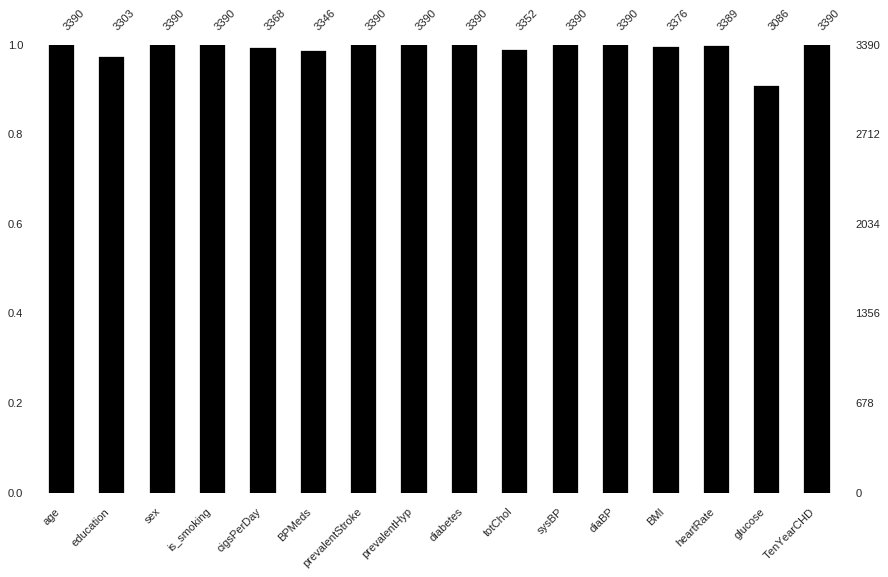

In [ ]:
# Visualizing the missing values
msno.bar(data, figsize=(13, 7), fontsize=10, color='black')

### What did you know about your dataset?

The dataset we've been presented with explains an ongoing caridovascular study on the residents of the town of Framingham, Massachussets.

Our main aim is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

The above dataset comprises of 3390 rows & 16 columns.

There are 0 duplicates present in the dataset.

There are a total of 510 missing values present in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(data.columns)

['age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [ ]:
# Dataset Describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.00,90.00,142.5


### Variables Description

Our Dataset comprises of 3390 rows & 16 columns.

Following is the description regarding each column:


*   **Demographic:**
 * **Sex**: male or female (Categorical - "M" or "F")
 * **Age**: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
 * **Education**: The level of education of the patient (Categorical - "1,2,3,4")

*   **Behavioral:**
 * **is_smoking**: whether or not the patient is a current smoker (Categorical - "YES" or "NO")
 * **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day (Categorical - can be considered continuous as one can have any number of cigarettes, even half a cigarette.)



*   **Medical (history):**
 * **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
 * **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
 * **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
 * **Diabetes**: whether or not the patient had diabetes (Nominal)


*   **Medical (current):**
 * **Tot Chol**: total cholesterol level (Continuous)
 * **Sys BP**: systolic blood pressure (Continuous)
 * **Dia BP**: diastolic blood pressure (Continuous)
 * **BMI**: Body Mass Index (Continuous)
 * **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
 * **Glucose**: glucose level (Continuous)


*   **Dependent/Target/Y variable**:

 * **TenYearCHD**: 10-year risk of coronary heart disease CHD(Binary - takes in '1' if yes otherwise '0' if no)



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in list(data.columns):
  print(f"""No. of unique values in "{i}" is {data[i].nunique()}.""")

No. of unique values in "age" is 39.
No. of unique values in "education" is 4.
No. of unique values in "sex" is 2.
No. of unique values in "is_smoking" is 2.
No. of unique values in "cigsPerDay" is 32.
No. of unique values in "BPMeds" is 2.
No. of unique values in "prevalentStroke" is 2.
No. of unique values in "prevalentHyp" is 2.
No. of unique values in "diabetes" is 2.
No. of unique values in "totChol" is 240.
No. of unique values in "sysBP" is 226.
No. of unique values in "diaBP" is 142.
No. of unique values in "BMI" is 1259.
No. of unique values in "heartRate" is 68.
No. of unique values in "glucose" is 132.
No. of unique values in "TenYearCHD" is 2.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Creating an instance of the dataset in order to preserve the original dataset.
df = data.copy()

In [ ]:
# Renaming the columns
df.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [ ]:
# Defining the Dependent, Indepenent Categorical & Independent Numerical variables
dependent_var = ['ten_year_chd']
categorical_var = [i for i in df.columns if df[i].nunique()<5]
numerical_var = [i for i in df.columns if i not in categorical_var]

In [ ]:
print(f' Dependent variables: {dependent_var} \n Indepenent Categorical variables: {categorical_var} \n Indepenent Numerical variables: {numerical_var} ')

 Dependent variables: ['ten_year_chd'] 
 Indepenent Categorical variables: ['education', 'sex', 'is_smoking', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'ten_year_chd'] 
 Indepenent Numerical variables: ['age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose'] 


### What all manipulations have you done and insights you found?



*   Renamed the columns for efficient pre-processing.
*   Defined Dependent, Indepenent Categorical & Indepenent Numerical features.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate Analysis**###

#### Chart - 1

In [ ]:
# Considering the dependent variable: ten_year_chd
print(df['ten_year_chd'].value_counts())

ten_year_chd
0    2879
1     511
Name: count, dtype: int64


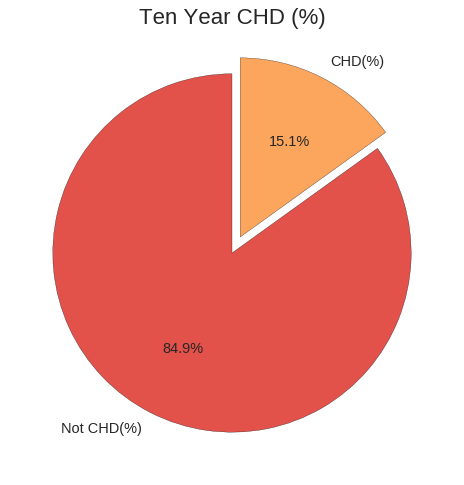

In [ ]:
# Visualizing the distribution of dependent variable: ten_year_chd
plt.figure(figsize=(13,7))
colors = sns.color_palette("Spectral")
explode = [0,0.1]
textprops = {'fontsize':13}
plt.pie(df['ten_year_chd'].value_counts(), labels=['Not CHD(%)','CHD(%)'], startangle=90, colors=colors, explode = explode, autopct="%1.1f%%",textprops = textprops)
plt.title('Ten Year CHD (%)', fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?



*   Pie charts are effective in illustrating proportions within a whole & for visualizing data presented as percentages.




##### 2. What is/are the insight(s) found from the chart?

* 15.1% i.e, 511 out of 3390 have coronary heart disease(CHD).
* 84.9% i.e, 2879 out of 3390 donot have coronary heart disease (CHD).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained are regarding the prevalence of coronary heart disease (CHD) can potentially create a positive business impact.

It provides an understanding of the proportion of individuals affected by CHD within the dataset.

This information can aid businesses in developing targeted products, services, or interventions related to heart health, leading to improved customer satisfaction, better health outcomes, and potentially new business opportunities in the healthcare industry.

#### Chart - 2

In [ ]:
# Considering the Numerical features
numerical_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose']

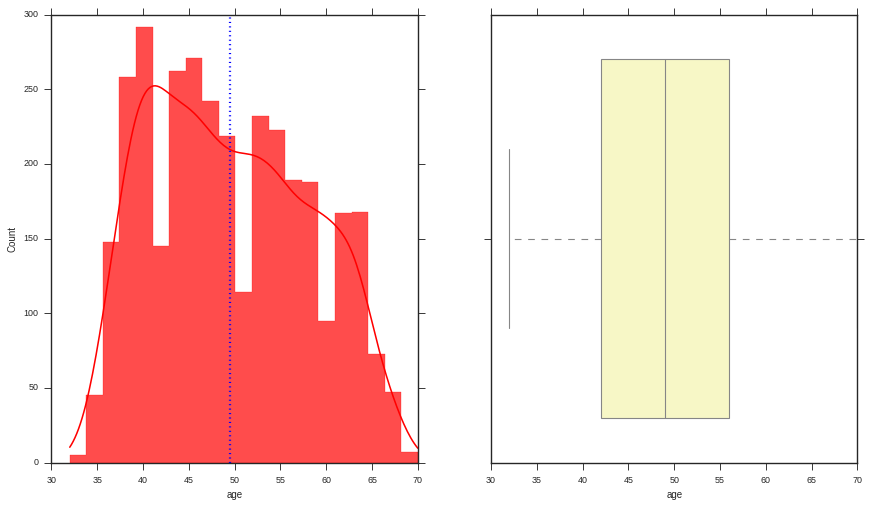

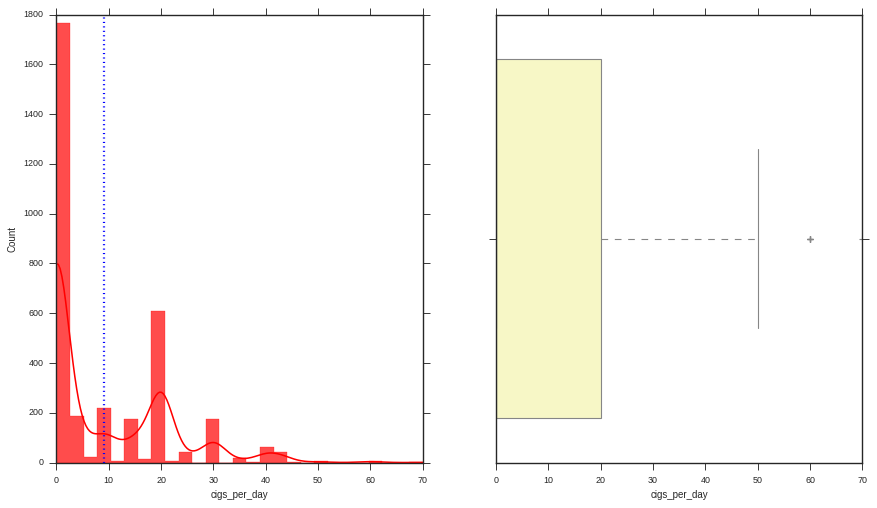

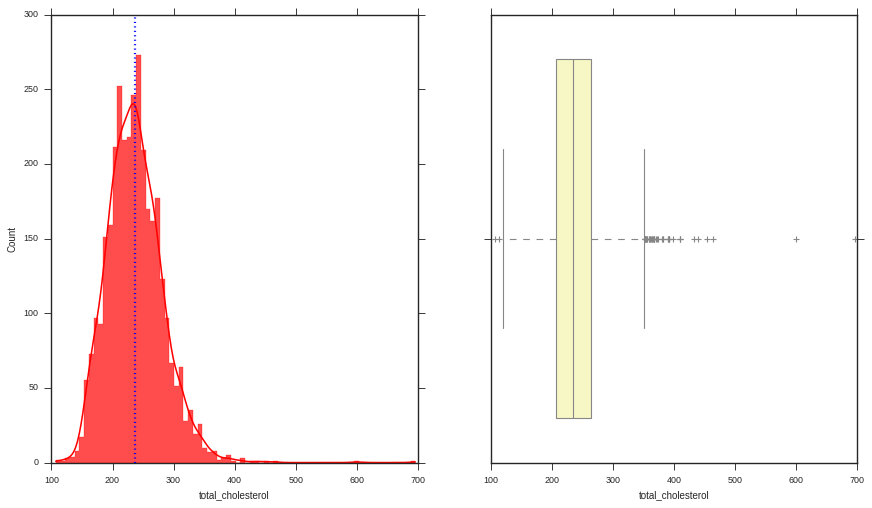

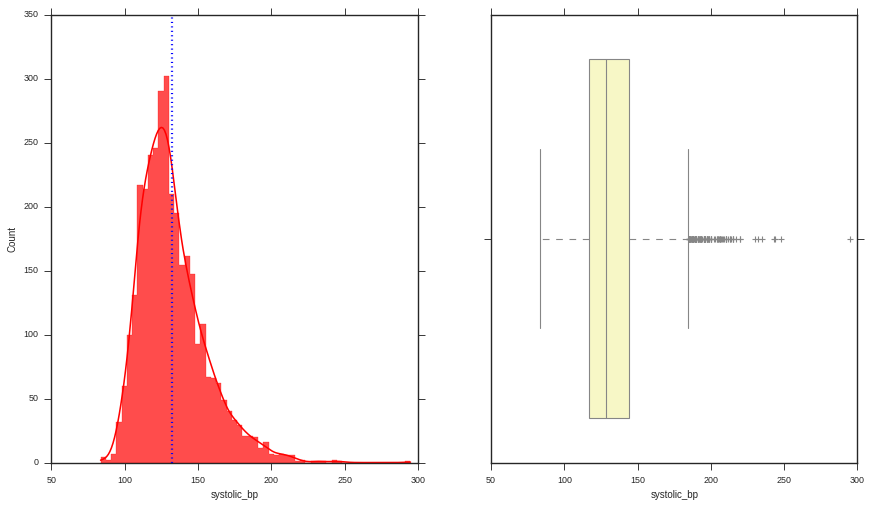

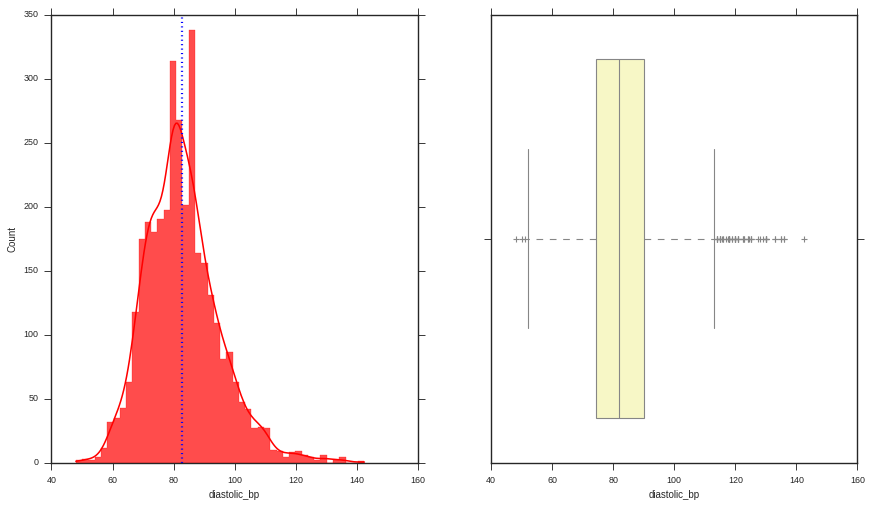

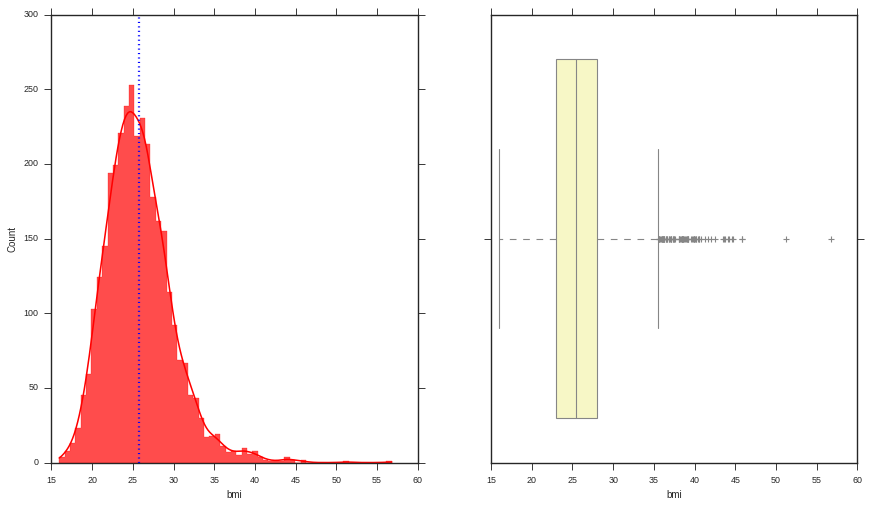

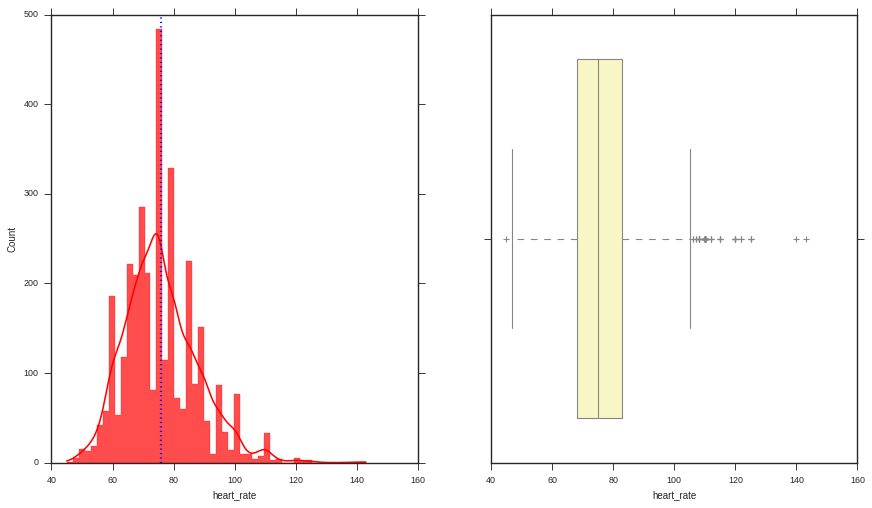

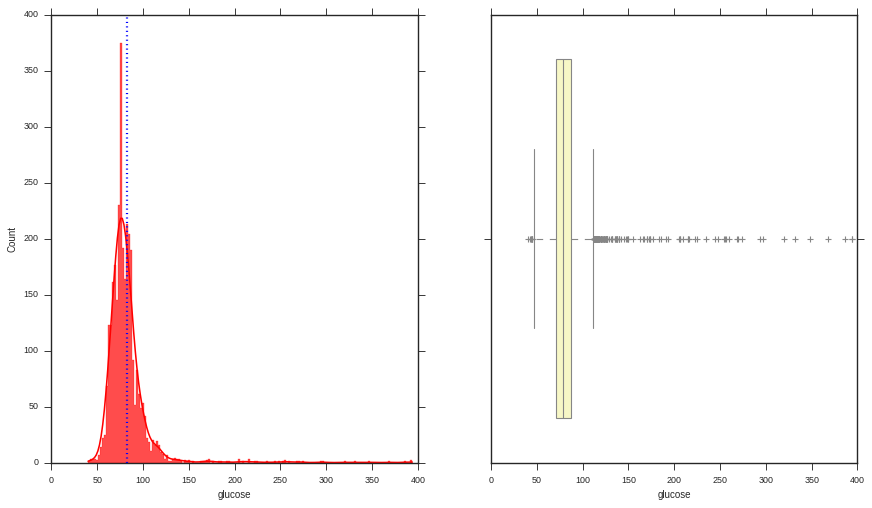

In [ ]:
# Visualizing the distribution of Numerical features
for var in numerical_var:
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,7))
  sns.histplot(df,x=var,kde=True,ax=ax1,element='step',color='red',alpha=0.7)
  ax1.axvline(df[var].mean(),color='blue', linestyle=':', linewidth=2)
  sns.boxplot(df,x=var,ax=ax2,palette="Spectral")
  plt.show()
  print('\n\n')

##### 1. Why did you pick the specific chart?

*   Histogram Plot describes the skewness of Independent Numerical features.
*   Box Plot describes the presence of outliers in the Independent Numerical features.

##### 2. What is/are the insight(s) found from the chart?

* Most of the Numerical features exhibit a close approximation to a normal distribution with some degree of skewness.
* Outliers are present in all numerical features, except for the "age" column.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained  from analyzing the distributions and identifying outliers in the numerical features can indeed have a positive business impact.

By understanding the distribution characteristics of the variables and addressing outliers, it becomes possible to make more accurate predictions and informed decisions.

This can lead to improved business strategies, optimized resource allocation, better risk management, and enhanced overall performance. Additionally, handling outliers before model building can result in more robust and reliable predictive models, further contributing to positive business outcomes.

#### Chart - 3

In [ ]:
# Considering the Categorical features
categorical_var

['education',
 'sex',
 'is_smoking',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'ten_year_chd']

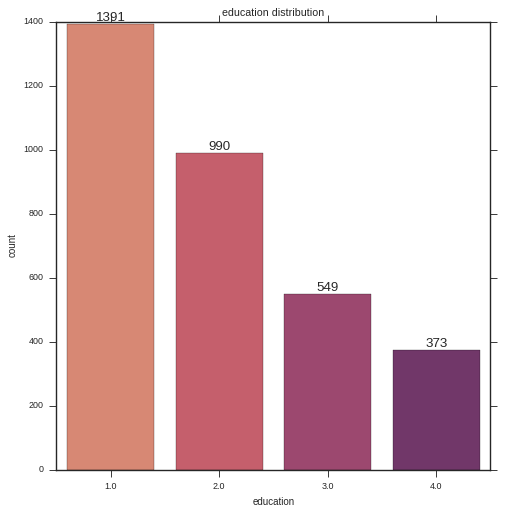

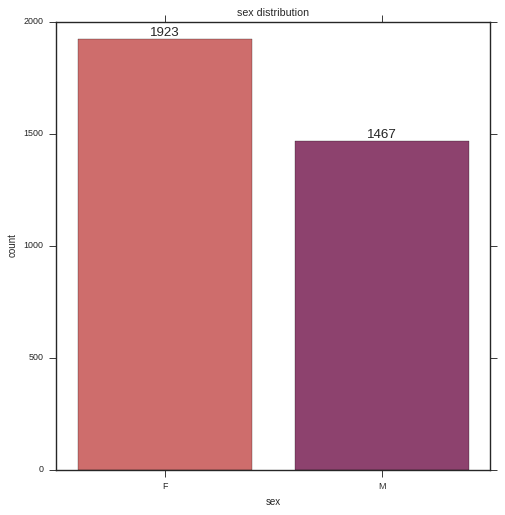

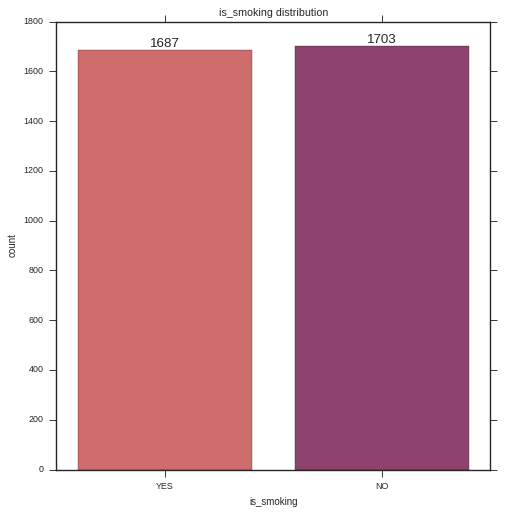

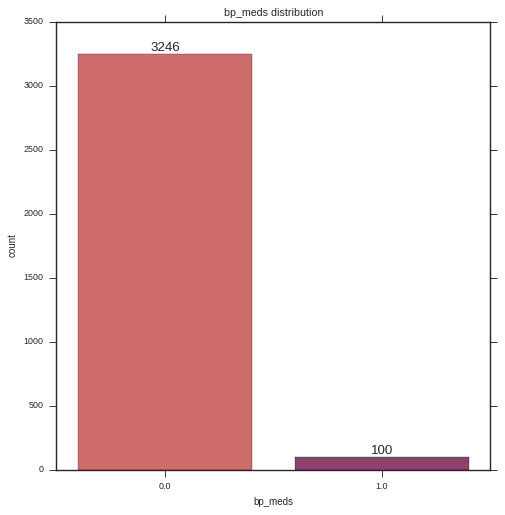

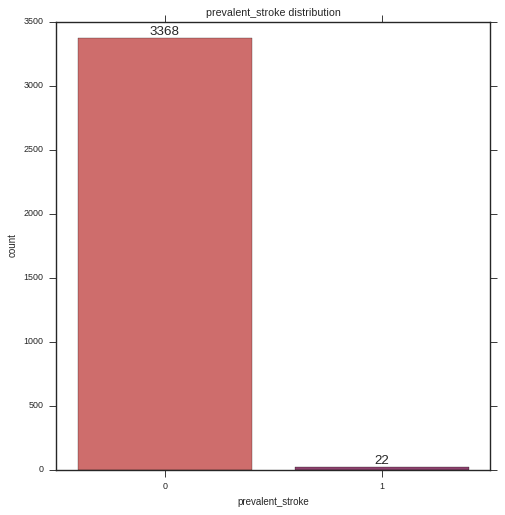

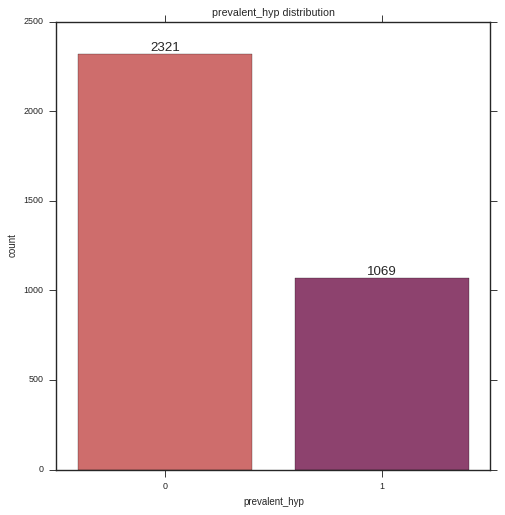

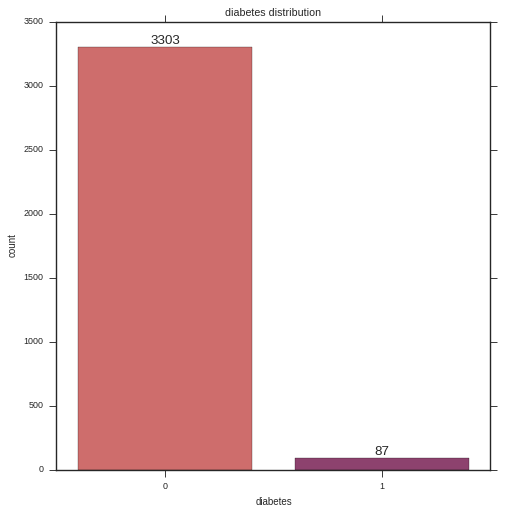

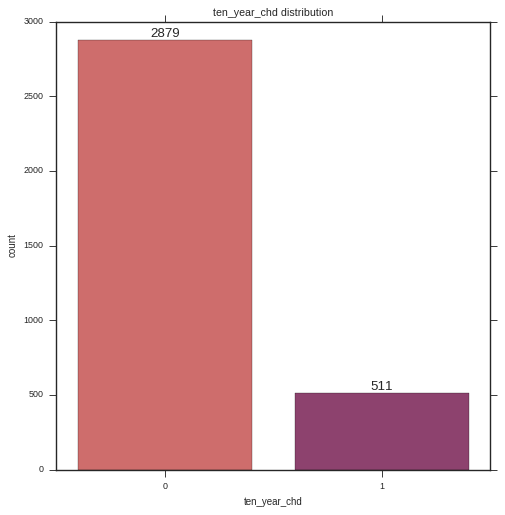

In [ ]:
# Visualizing the distribution of Categorical features
for i in categorical_var:
  plt.figure(figsize=(7,7))
  ax=sns.countplot(df, x=i, palette="flare")
  for label in ax.containers:
    ax.bar_label(label)
  plt.xlabel(i)
  plt.title(i+' distribution')
  plt.show()

##### 1. Why did you pick the specific chart?

* Bar charts helps in comparing the sizes/frequencies of various categories or groups of data.

* They are particularly valuable when it comes to comparing data across different categories, enabling effective visualization of substantial amounts of information within a confined space.

##### 2. What is/are the insight(s) found from the chart?

* In the education column, the highest count is observed for category 1, followed by categories 2, 3, and 4.

* The distribution of gender is uneven, with a higher count for females compared to males.

* The distribution in the is_smoking column appears to be even.

* The columns for bp_meds, prevalent_stroke, prevalent_hyp, and diabetes display an imbalance, with a limited number of positive cases.

* The ten_year_chd column also exhibits an imbalance, with a relatively small number of positive cases compared to the negative cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making.

Understanding the distribution of categories in various columns helps identify patterns and target specific demographics or areas of focus.

 For example, businesses can develop tailored marketing campaigns based on the gender distribution or design educational programs based on the education levels of the target audience. Additionally, recognizing the imbalanced distribution of health conditions can guide businesses in developing specialized treatments or preventive measures to address specific needs.

### **Bivariate Analysis**

#### Chart - 4

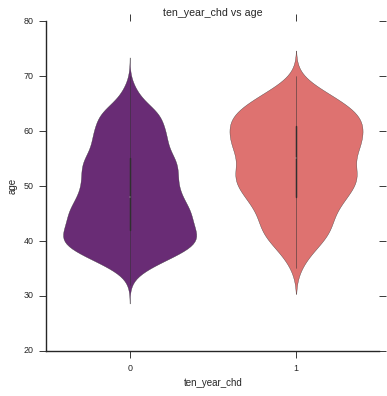

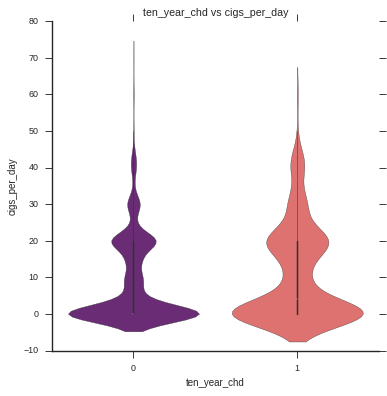

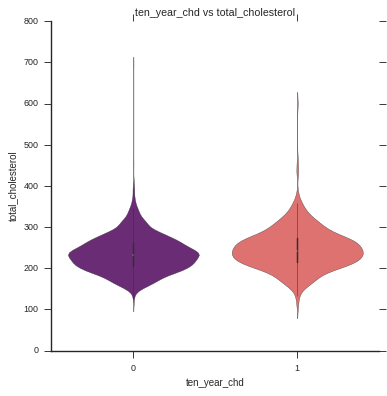

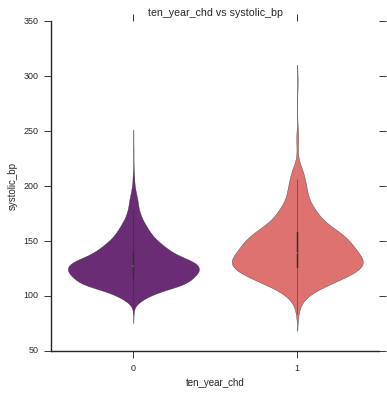

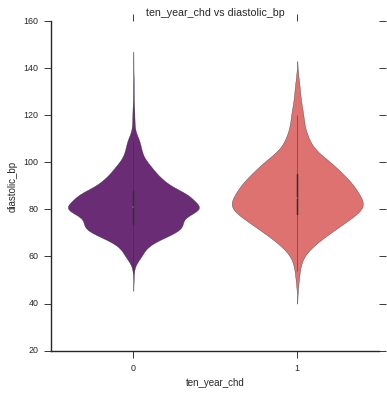

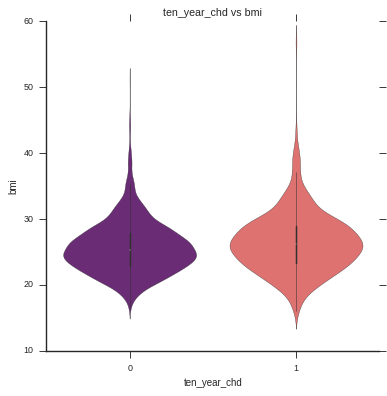

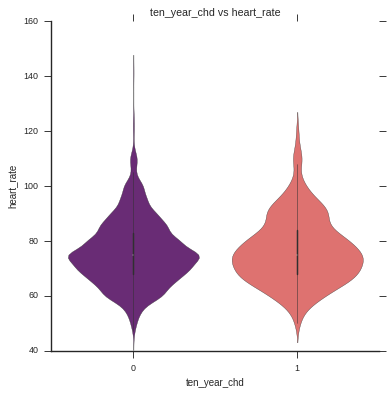

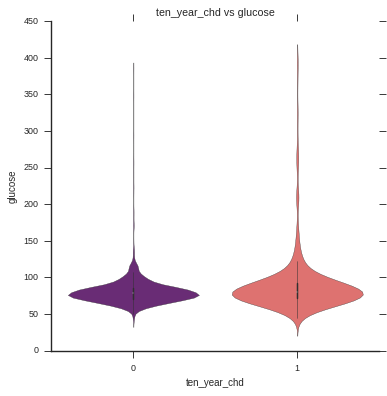

In [ ]:
# Visualizing the distribution between Numerical features & the depenent variable
for i in numerical_var:
  sns.catplot(df, x=dependent_var[0], y=i, kind='violin', palette='magma')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0])
  plt.title(dependent_var[0]+' vs '+i)
  plt.show()

##### 1. Why did you pick the specific chart?

* The violin chart is a type of data visualization that combines aspects of a box plot and a kernel density plot.

* It is used for displaying the distribution and density of data across different categories or groups.

##### 2. What is/are the insight(s) found from the chart?

* When comparing age and ten_year_chd, it is evident that the density of positive cases is significantly higher among older individuals, suggesting a higher occurrence of the condition in the elderly.

* When comparing cigs_per_day an ten_year_chd, non-smokers exhibit a greater number of negative cases, whereas the positive cases are relatively fewer among non-smokers.

* When comparing glucose and ten_year_chd, the density of negative cases surpasses that of positive cases for similar glucose values, indicating a higher prevalence of negative cases within the given glucose range.

* The remaining charts do not offer any substantial insights or noteworthy patterns in the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the relationships between age and ten_year_chd, cigs_per_day and ten_year_chd, and glucose and ten_year_chd can potentially lead to positive business impacts.

Tailoring healthcare services and marketing campaigns to the elderly population, promoting smoking cessation programs for non-smokers, and providing targeted interventions for individuals within specific glucose ranges can improve health outcomes and customer satisfaction.

These insights enable businesses to develop more effective preventive measures, enhance risk assessment strategies, and provide personalized healthcare solutions. By leveraging these insights, businesses can contribute to improved public health, customer engagement, and overall business success.

#### Chart - 5

<Figure size 560x560 with 0 Axes>

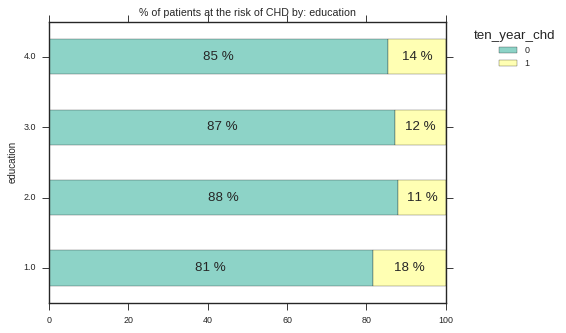

<Figure size 560x560 with 0 Axes>

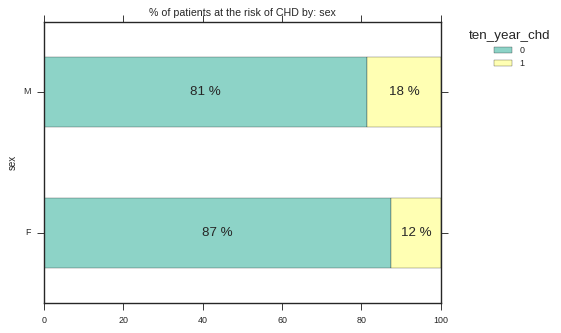

<Figure size 560x560 with 0 Axes>

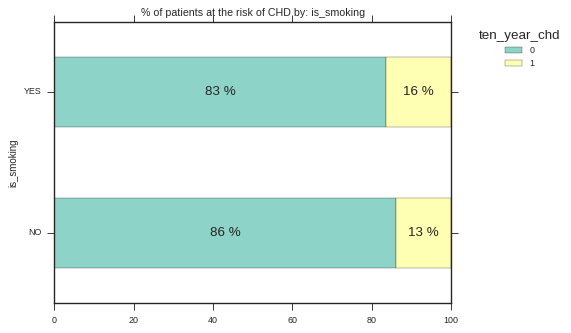

<Figure size 560x560 with 0 Axes>

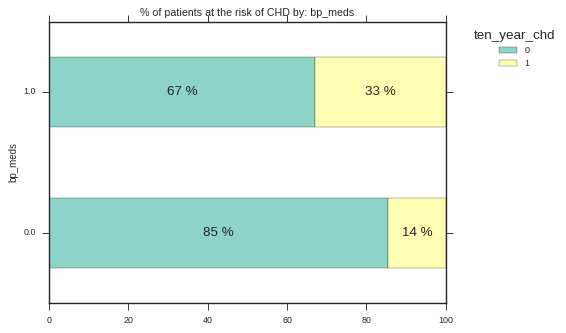

<Figure size 560x560 with 0 Axes>

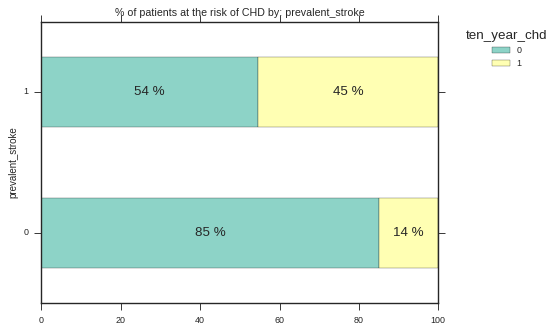

<Figure size 560x560 with 0 Axes>

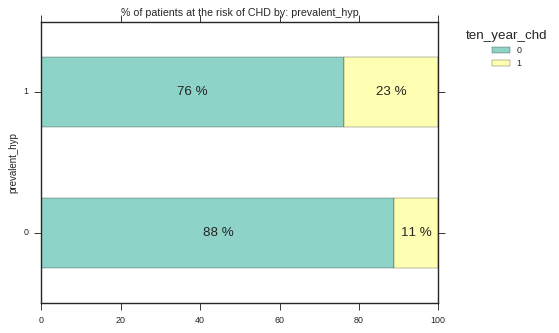

<Figure size 560x560 with 0 Axes>

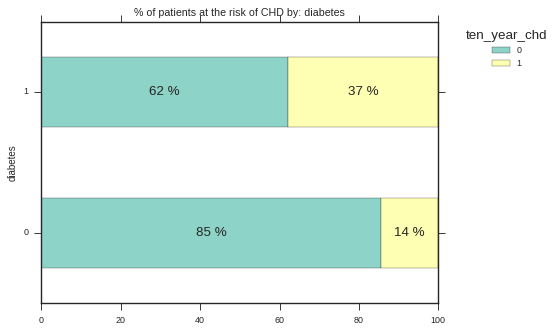

In [ ]:
# Visualizing the distribution between Categorical features & the depenent variable
for i in categorical_var[:-1]:
    x_var, y_var = i, dependent_var[0]
    plt.figure(figsize=(7,7))
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True,color=sns.color_palette('Set3'))

    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

##### 1. Why did you pick the specific chart?

* A 100% horizontal stacked bar chart is a type of data visualization that represents the composition or proportion of multiple categories within a whole.

##### 2. What is/are the insight(s) found from the chart?

* The percentage of CHD as per education does not provide much information as it is similar throughout the different education categories.

* For sex we see that there is a slightly higher chance of CHD in male than in female.

* For is_smoking again a very slightly high percentage of CHD is seen for the positive category of is_smoking.

* For bp_meds and diabetes, we see high percentage of CHD for positive cases compared to the negative case.

* For the positive prevalent_stroke, the percentage is almost half indicating that the positive CHD is high for positive prevalent_stroke.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart reveals the distribution and composition of different categories in relation to the occurrence of CHD.

These insights can guide businesses in developing targeted strategies and interventions to address specific demographic groups or risk factors.

For example, businesses can design preventive measures, educational campaigns, or tailored treatments to reduce the occurrence of CHD in high-risk categories. By leveraging these insights, businesses in the healthcare industry can improve patient outcomes, enhance customer satisfaction, and drive positive growth.

### **Multivariate Analysis**

#### Chart - 6 - Correlation Heatmap

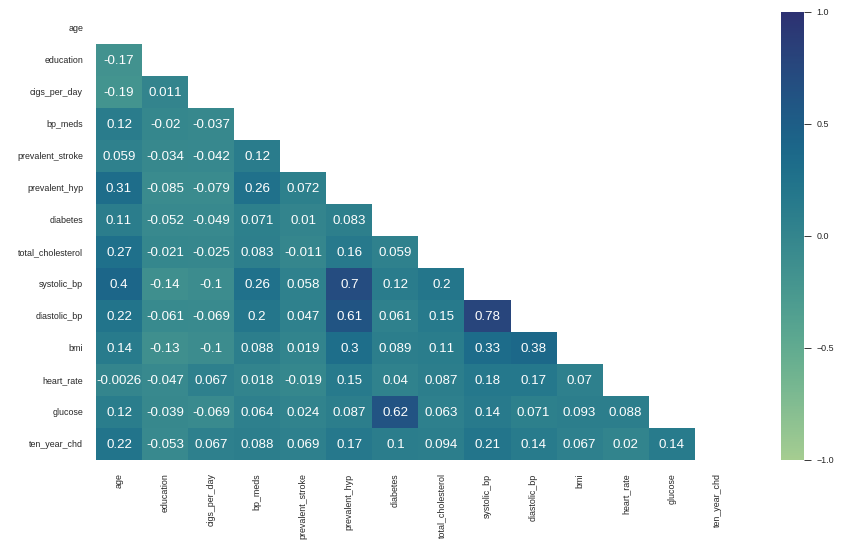

In [ ]:
# Visualizing the distributions between multiple indepenent features
df_numeric = df.select_dtypes(exclude=['object'])

corr = df_numeric.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 7))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="crest")

##### 1. Why did you pick the specific chart?

* A correlation coefficient provides information about the strength and direction of a linear relationship between two variables.

* It is a valuable metric for understanding the relationships within a dataset.

* By calculating the correlation between all variables and visualizing it in a correlation heatmap, we gain insights into the interdependencies among variables.

##### 2. What is/are the insight(s) found from the chart?

* Here we see that the systolic_bp and diastolic_bp are highly correlated with coefficient of correlation 0.78.

* Also diabetes and glucose have a correlation of 0.62.

* Education is not important as the CHD will not be acquired based on education level of a person so we can drop education column.

#### Chart - 7 - Pair Plot

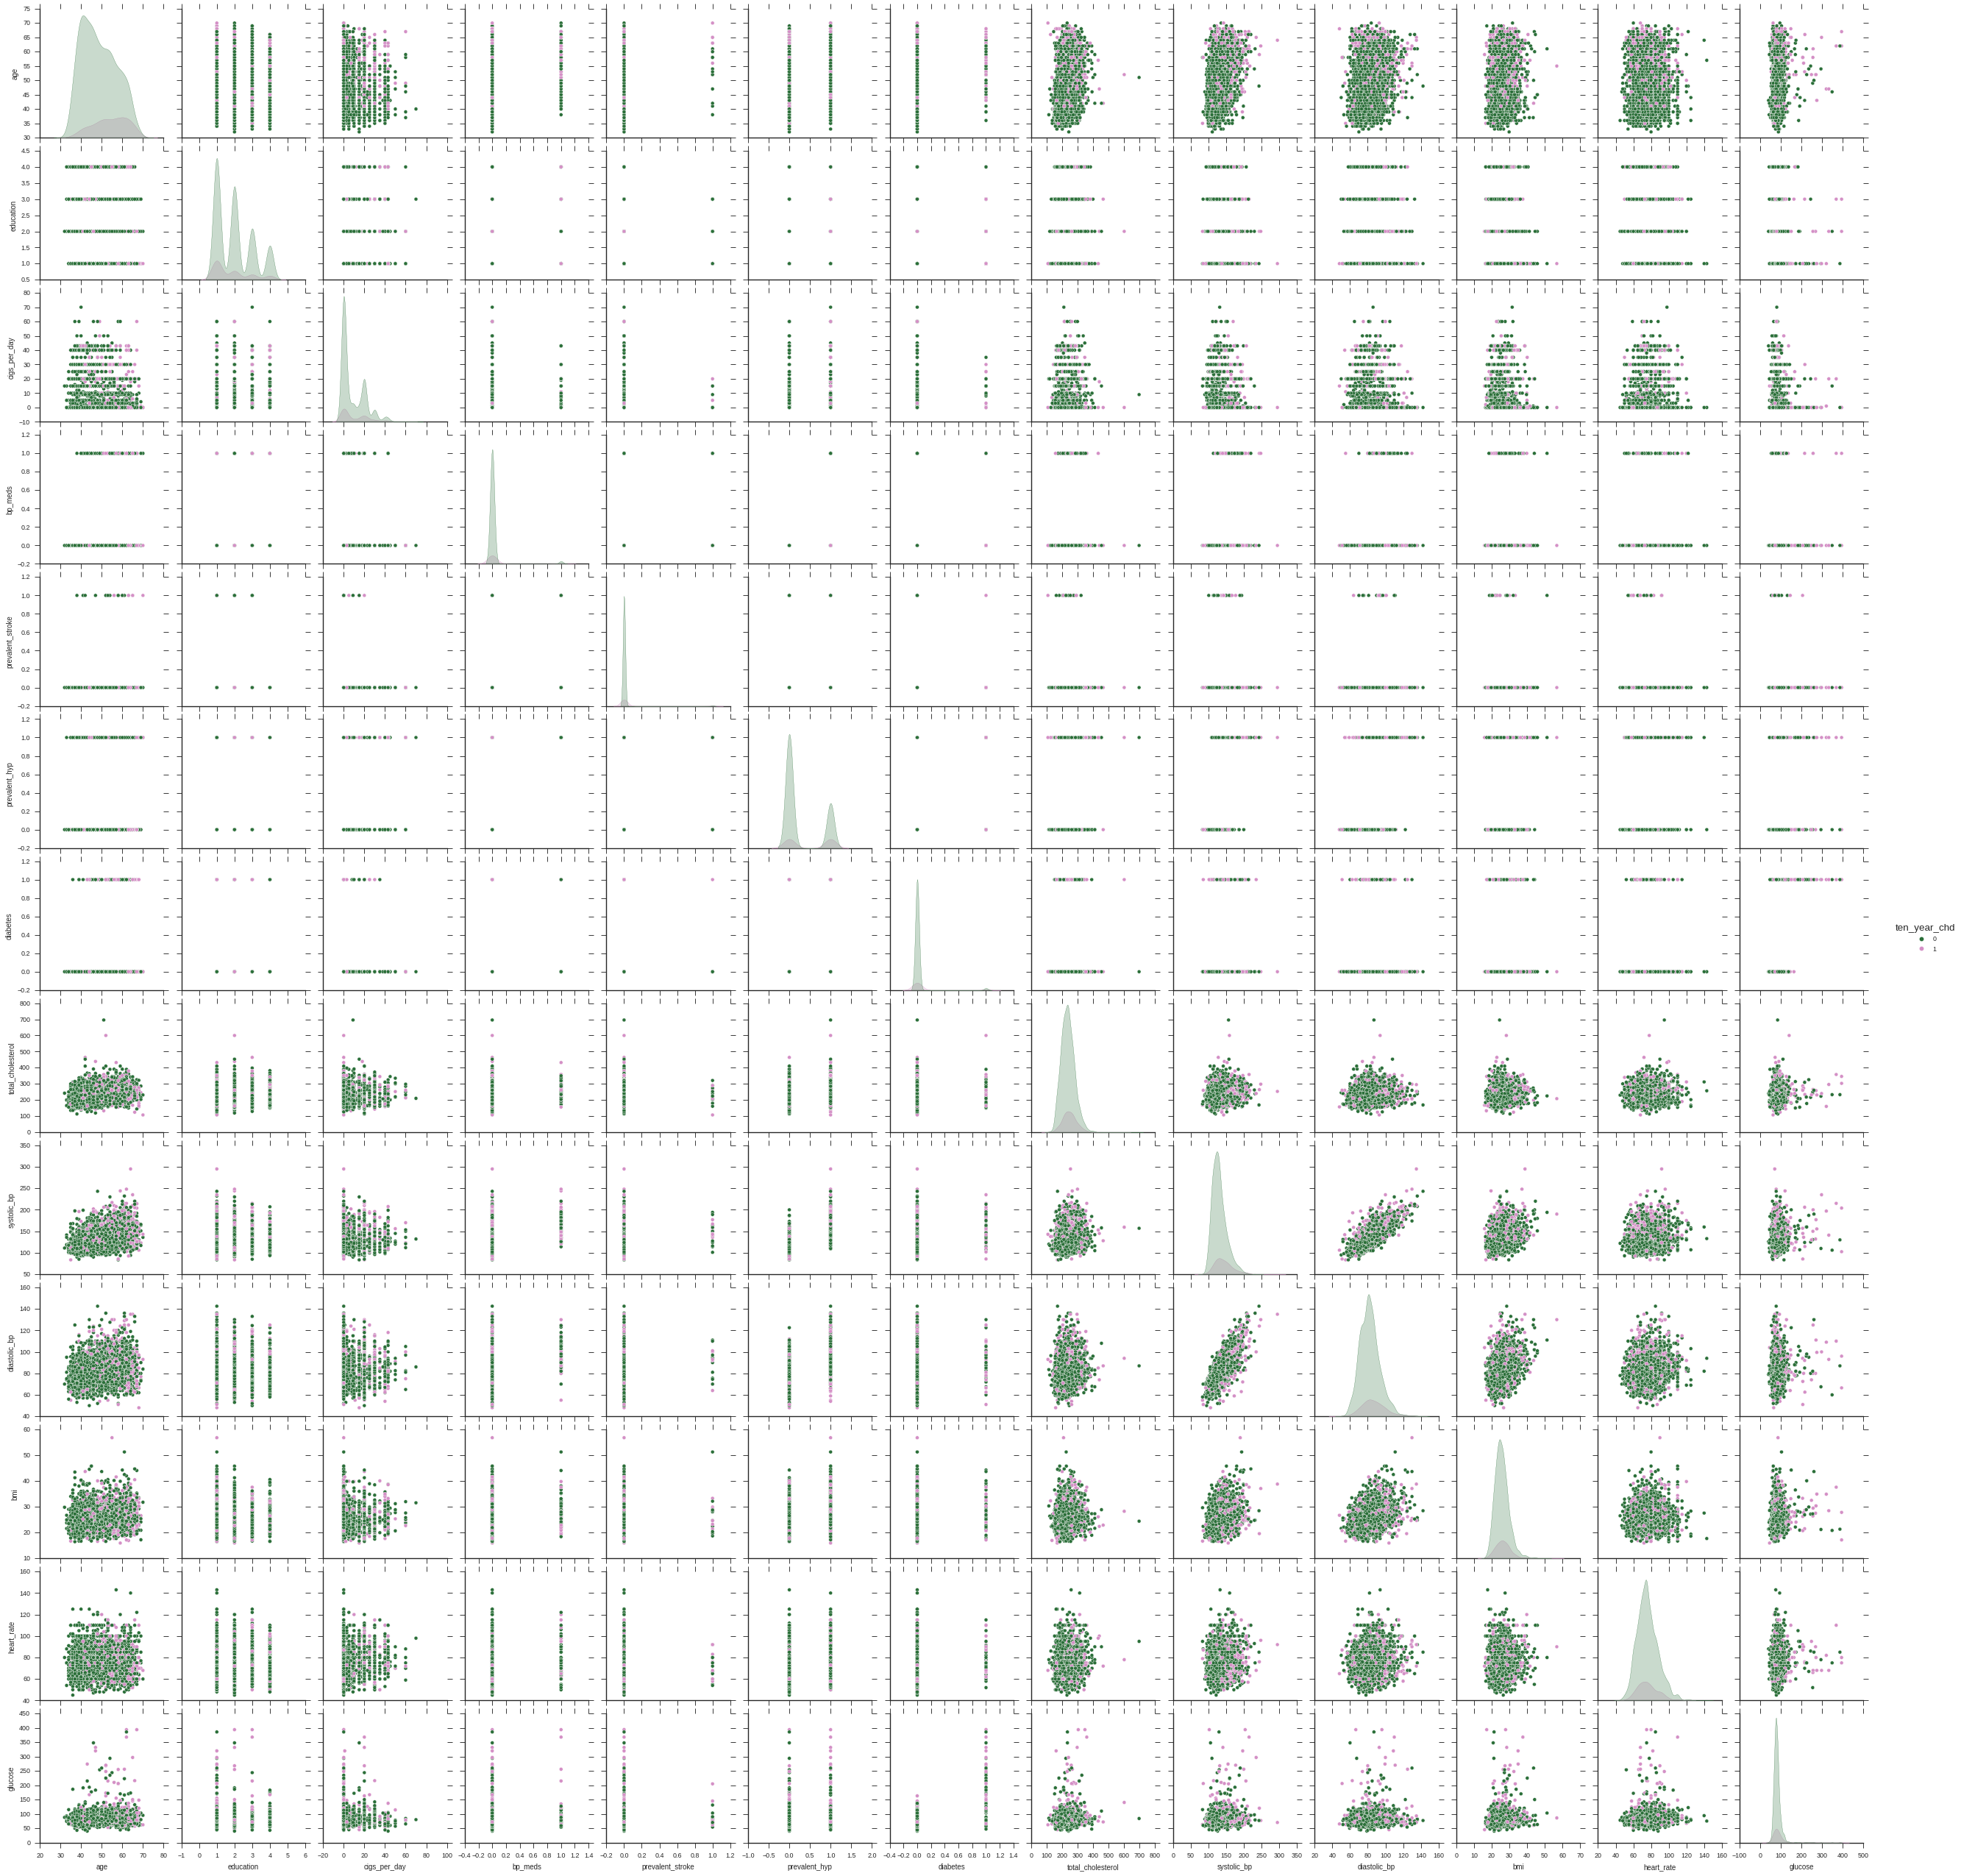

In [ ]:
# Visualizing the distributions between multiple indepenent features & depenent variable
sns.pairplot(df,hue="ten_year_chd",palette='cubehelix')
plt.show()

##### 1. Why did you pick the specific chart?

* A pairplot or a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset.

* It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

## ***5. Hypothesis Testing***

### Hypothetical Statement

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis**: There is no association between education level and CHD outcome.

**Alternate hypothesis**: There is an association between education level and CHD outcome.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#Create contingency table
contingency_table=pd.crosstab(df['education'], df['ten_year_chd'])
print(contingency_table)

#perform chi-squared test
chi2,p,dof,expected = chi2_contingency(contingency_table)

#print p-value
print(f'p-value: {p}')

ten_year_chd     0    1
education              
1.0           1135  256
2.0            872  118
3.0            479   70
4.0            319   54
p-value: 6.038646749234552e-05


Since the p-value is greater than the level of significance at alpha= 0.05, we conclude that  "there is insufficient evidence to reject the null hypothesis of no association between education level and CHD based on the p-value exceeding the chosen significance level (alpha = 0.05)

In [ ]:
# Dropping 'education' column because there is  no association between education level and CHD outcome based on Hypothesis Testing:
df.drop('education',axis=1,inplace=True)

##### Which statistical test have you done to obtain P-Value?

To test the hypothesis that the ‘education’ column does not impact the outcome of chronic heart disease (CHD), I performed a chi-squared test of independence. This statistical test allowed me to determine if there was a significant association between education level and CHD outcome. By calculating the chi-squared statistic and p-value, I was able to make a statistical inference about the relationship between these two variables in our dataset.

##### Why did you choose the specific statistical test?

I chose to use the chi-squared test of independence to test the hypothesis that the ‘education’ column does not impact the outcome of chronic heart disease (CHD) because it is an appropriate statistical test for determining if there is a significant association between two categorical variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

**bp_meds:**

In [ ]:
df['bp_meds'] = df['bp_meds'].fillna(df['bp_meds'].mode()[0])

**cigs_per_day:**

In [ ]:
# Mean and median number of cigarettes per day
df.cigs_per_day.mean().round(0),df.cigs_per_day.median()

(9.0, 0.0)

In [ ]:
# All missing values in the cigs_per_day column
df[df['cigs_per_day'].isna()]

,age,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
422,55,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,49,F,YES,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


Based on the observation, it appears that all entries with missing values for the "cigs per day" variable have a corresponding "is smoking" column value of "YES," indicating that these individuals smoke


In [ ]:
# Imputing the missing values in the cigs_per_day
df['cigs_per_day'] = df['cigs_per_day'].fillna(df[df['is_smoking']=='YES']['cigs_per_day'].median())

**Cholesterol, BMI & Heartrate:**

In [ ]:
# Mean and median for total_cholesterol
print(f'Cholestrol : {df.total_cholesterol.mean().round(2),df.total_cholesterol.median()}')

# Mean and median for bmi
print(f'BMI : {df.bmi.mean().round(2),df.bmi.median()}')

# Mean and median for heart_rate
print(f'Heart Rate : {df.heart_rate.mean().round(2),df.heart_rate.median()}')

Cholestrol : (237.07, 234.0)
BMI : (25.79, 25.38)
Heart Rate : (75.98, 75.0)


In [ ]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values
df['total_cholesterol'] = df['total_cholesterol'].fillna(df['total_cholesterol'].median())
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['heart_rate'] = df['heart_rate'].fillna(df['heart_rate'].median())

**Glucose:**

In [ ]:
# total missing values in glucose
df.glucose.isna().sum()

304

In the glucose column, 304 data points are missing. Using the mean or median to fill in these values could introduce significant inaccuracies.

To counteract this, the KNN imputer method could be employed to replace the missing data.

In [ ]:
# Highly positively skewed
df.glucose.skew()

6.1443896544049394

In [ ]:
# Replacing the string values of the categorical  column with 0 and 1
df['sex'] = np.where(df['sex'] == 'M',1,0)
df['is_smoking'] = np.where(df['is_smoking'] == 'YES',1,0)

In [ ]:
# Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=6)
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

In [ ]:
# checking for missing values
df.isna().sum()

age                  0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

I employed various techniques, such as median, mode, and KNN imputation, to address the missing values in my dataset. Each technique was selected based on its suitability for the specific characteristics of the data and the problem at hand.

For numerical variables that exhibited skewness or were prone to outliers, I utilized median imputation. By replacing missing values with the median, which is a robust measure of central tendency, I mitigated the influence of extreme values and ensured a more representative estimate.

In the case of categorical variables, I opted for mode imputation. The mode, being the most frequent value, provided a reasonable approximation for the missing values within those variables.

To leverage the patterns and relationships present in the data, I employed KNN imputation. This method identifies similar observations within the dataset and utilizes their values to impute missing values. By considering the characteristics of neighboring data points, the imputed values were likely to be more accurate and reflective of the underlying patterns.

By employing these diverse imputation techniques, I aimed to handle the missing values appropriately, accounting for the nature of the variables and the unique requirements of the analysis.

### 2. Handling Outliers

In [ ]:
numerical_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose']

In [ ]:
# Handling Outliers & Outlier treatments
for col in numerical_var:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  IQR=q3 - q1
  lower_limit=q1 - 1.5*IQR
  upper_limit=q3 + 1.5*IQR
  df[col]=np.where(df[col]>upper_limit,upper_limit,np.where(df[col]<lower_limit,lower_limit,df[col]))

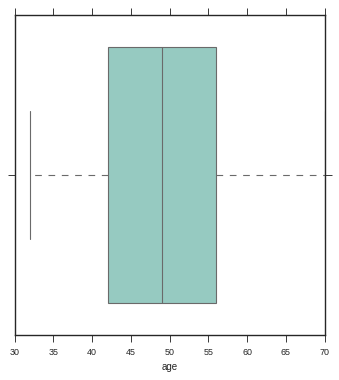

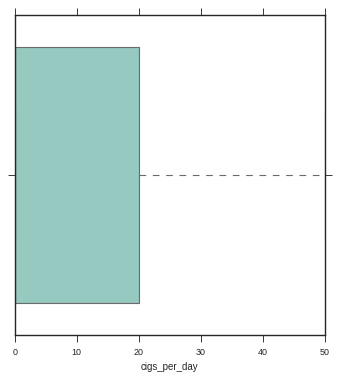

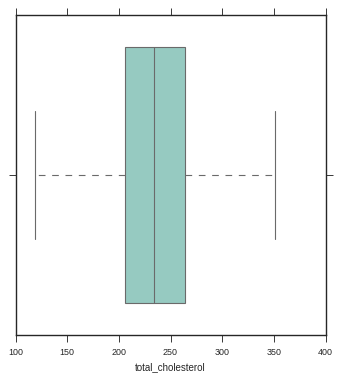

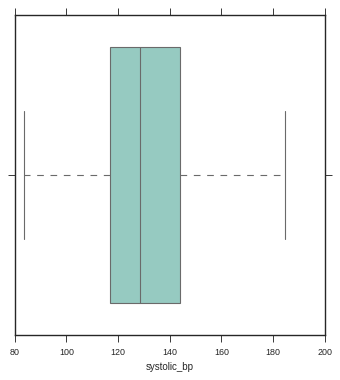

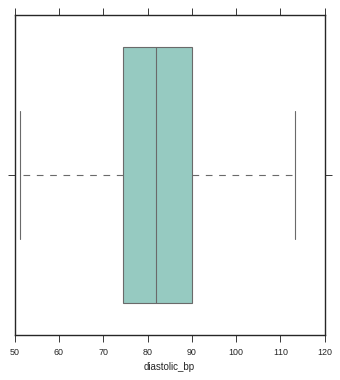

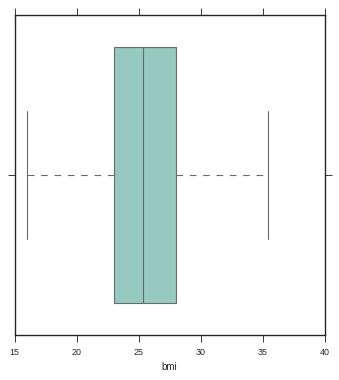

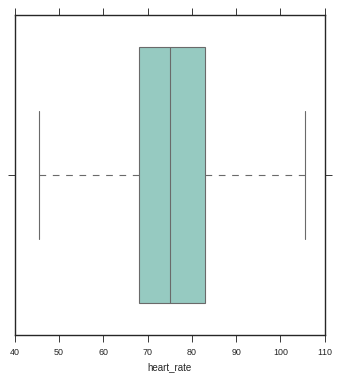

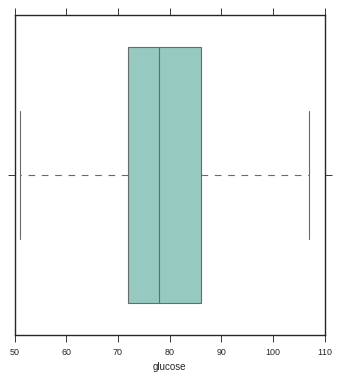

In [ ]:
for col in numerical_var:
  plt.figure(figsize=(5,5))
  sns.boxplot(df,x=col,palette="Set3")
  plt.show()

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#remove multicollinearity by using VIF technique
def calc_vif(X):
  vif=pd.DataFrame()
  vif['variables']=X.columns
  vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return vif

In [ ]:
calc_vif(df[numerical_var])

,variables,VIF
0,age,42.846339
1,cigs_per_day,1.641415
2,total_cholesterol,33.353265
3,systolic_bp,124.490515
4,diastolic_bp,135.507198
5,bmi,50.083324
6,heart_rate,40.633660
7,glucose,39.166760


In [ ]:
# Creating a new column pulse_pressure and dropping systolic_bp and diastolic_bp
df['pulse_pressure'] = df['systolic_bp']-df['diastolic_bp']
df.drop('systolic_bp',axis=1,inplace=False)
df.drop('diastolic_bp',axis=1,inplace=False)

,age,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,bmi,heart_rate,glucose,ten_year_chd,pulse_pressure
0,64.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,221.0,148.0,25.38,90.0,80.0,1.0,63.00
1,36.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,29.77,72.0,75.0,0.0,70.00
2,46.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,20.35,88.0,94.0,0.0,45.00
3,50.0,1.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,158.0,28.26,68.0,94.0,1.0,70.00
4,64.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,26.42,70.0,77.0,0.0,51.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,261.0,123.5,29.28,70.0,103.0,0.0,44.50
3386,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,199.0,102.0,21.96,80.0,84.0,0.0,46.00
3387,44.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0,351.0,164.0,28.92,73.0,72.0,1.0,50.75
3388,60.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,191.0,167.0,23.01,80.0,85.0,0.0,62.00


In [ ]:
# Updating the numerical_var list

numerical_var.remove('systolic_bp')
numerical_var.remove('diastolic_bp')
numerical_var.append('pulse_pressure')

In [ ]:
calc_vif(df[numerical_var])

,variables,VIF
0,age,41.888848
1,cigs_per_day,1.639381
2,total_cholesterol,32.816358
3,bmi,40.251805
4,heart_rate,37.638548
5,glucose,38.859118
6,pulse_pressure,17.544829


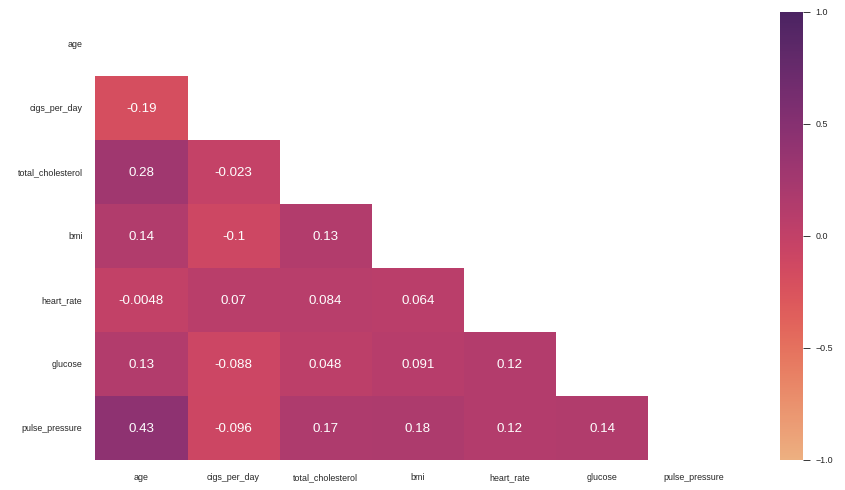

In [ ]:
corr = df[numerical_var].corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 7))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="flare")

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# dropping is_smoking
df.drop('is_smoking',axis=1,inplace=True)
categorical_var.remove('is_smoking')
categorical_var

['education',
 'sex',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'ten_year_chd']

##### What all feature selection methods have you used  and why?

We have used variance inflation factor to remove multicollinearity and we found that the systolic and diastolic blood pressure have high VIF, so we created a new feature which is pulse pressure.

It was also found that the is_smoking column just had the values yes or no for smoking and the same was conveyed in the cigs_per_day column where for non smoker, the column had 0 and for smoker it had the number of cigeratte per day.

##### Which all features you found important and why?

In [ ]:
df.columns

Index(['age', 'sex', 'cigs_per_day', 'bp_meds', 'prevalent_stroke',
       'prevalent_hyp', 'diabetes', 'total_cholesterol', 'systolic_bp',
       'diastolic_bp', 'bmi', 'heart_rate', 'glucose', 'ten_year_chd',
       'pulse_pressure'],
      dtype='object')

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
df[numerical_var].skew()

age                  0.225796
cigs_per_day         1.127284
total_cholesterol    0.340533
bmi                  0.450492
heart_rate           0.418170
glucose              0.480585
pulse_pressure       0.946833
dtype: float64

In [ ]:
#applying sqrt transformation on cigs_per_day and pulse_pressure because both of the columns are lightly skewed while rest of the columns are close to normal
df['cigs_per_day']          = np.sqrt(df['cigs_per_day'])
df['pulse_pressure']        = np.sqrt(df['pulse_pressure'])

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler=StandardScaler()
df_numerical_scaled=scaler.fit_transform(df[numerical_var])

In [ ]:
features = [i for i in df.columns if i not in ['ten_year_chd']]
features

['age',
 'sex',
 'cigs_per_day',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose',
 'pulse_pressure']

In [ ]:
# Create a new dataframe with the scaled numerical columns
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=numerical_var)

# Combine the scaled numerical columns with the categorical columns
df_scaled=pd.concat([df_numerical_scaled, df.drop(numerical_var, axis=1)],axis=1)

In [ ]:
df_scaled

,age,cigs_per_day,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure,sex,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,systolic_bp,diastolic_bp,ten_year_chd
0,1.682783,-0.131026,-0.362779,-0.085301,1.226815,0.007398,1.023762,0.0,0.0,0.0,0.0,0.0,148.0,85.00,1.0
1,-1.576210,-0.904920,-0.572897,1.066765,-0.332741,-0.406227,1.474850,1.0,0.0,0.0,1.0,0.0,168.0,98.00,0.0
2,-0.412284,0.508011,0.314268,-1.405321,1.053531,1.165548,-0.267527,0.0,0.0,0.0,0.0,0.0,116.0,71.00,0.0
3,0.053287,1.093267,-0.082622,0.670496,-0.679309,1.165548,1.474850,1.0,0.0,0.0,1.0,0.0,158.0,88.00,1.0
4,1.682783,1.542349,0.104150,0.187626,-0.506025,-0.240777,0.224326,0.0,0.0,0.0,0.0,0.0,136.5,85.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,1.217213,-0.904920,0.571079,0.938174,-0.506025,1.910072,-0.306792,0.0,0.0,0.0,0.0,0.0,123.5,79.00,0.0
3386,-0.412284,-0.904920,-0.876401,-0.982809,0.360395,0.338298,-0.189648,0.0,0.0,0.0,0.0,0.0,102.0,56.00,0.0
3387,-0.645069,-0.131026,2.672259,0.843700,-0.246099,-0.654402,0.169223,1.0,0.0,0.0,1.0,0.0,164.0,113.25,1.0
3388,1.217213,-0.904920,-1.063172,-0.707258,0.360395,0.421023,0.957313,1.0,0.0,0.0,1.0,0.0,167.0,105.00,0.0


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not needed. We have already reduced the number of features and only the important features are left.


### 8. Data Splitting

In [ ]:
X=df_scaled.drop('ten_year_chd',axis=1)
y=df_scaled['ten_year_chd']

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19, stratify=y)

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes the dataset is imbalanced and the number of positive cases is very low compared to the negative cases.

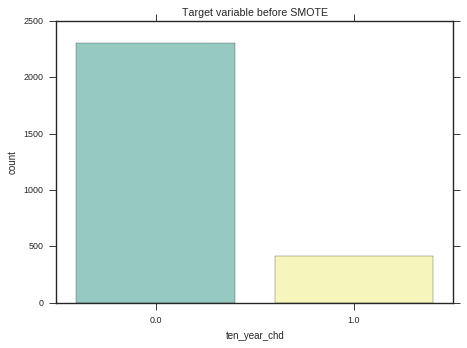

In [ ]:
# Handling Imbalanced Dataset
# visualize the target variable before SMOTE
sns.countplot(x=y_train,palette='Set3')
plt.title('Target variable before SMOTE')
plt.show()

In [ ]:
# Oversampling using SMOTETomek
smote=SMOTETomek(random_state=19)
X_smote,y_smote= smote.fit_resample(X_train,y_train)

print('Samples in the original dataset: ', len(y_train))
print('Samples in the resampled dataset: ', len(y_smote))

Samples in the original dataset:  2712
Samples in the resampled dataset:  4546


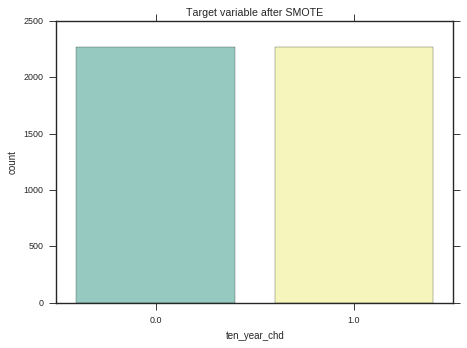

In [ ]:
# visualize the target variable after SMOTE
sns.countplot(x=y_smote,palette='Set3')
plt.title('Target variable after SMOTE')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used the SMOTE combined with Tomek links undersampling technique to handle the imbalanced dataset. SMOTE works by generating synthetic samples from the minority class to balance the class distribution.

It does this by selecting instances that are close in the feature space and drawing a line between them, then creating new instances along this line. Tomek links undersampling removes Tomek links, which are pairs of instances from different classes that are very close to each other in the feature space. By removing these instances, the decision boundary between the classes can be made clearer.

## ***7. ML Model Implementation***

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    try:
      try:
        feature_importance = model.feature_importances_
      except:
        feature_importance = model.coef_
      feature_importance = np.absolute(feature_importance)
      if len(feature_importance)==len(features):
        pass
      else:
        feature_importance = feature_importance[0]


      feat = pd.Series(feature_importance, index=features)
      feat = feat.sort_values(ascending=True)
      plt.figure(figsize=(10,6))
      plt.title('Feature Importances for '+str(model), fontsize = 18)
      plt.xlabel('Relative Importance')
      feat.plot(kind='barh')
    except AttributeError:
        print("\nThe model does not have feature importances attribute.")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

In [ ]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])

### ML Model - 1

##**Logistic Regression**

In [ ]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)


Train ROC AUC: 0.6788385393752749
Test ROC AUC: 0.6614583333333334


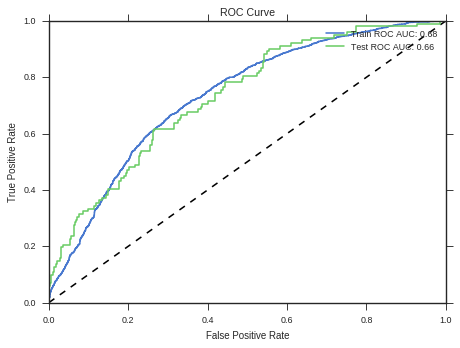


Confusion Matrix:


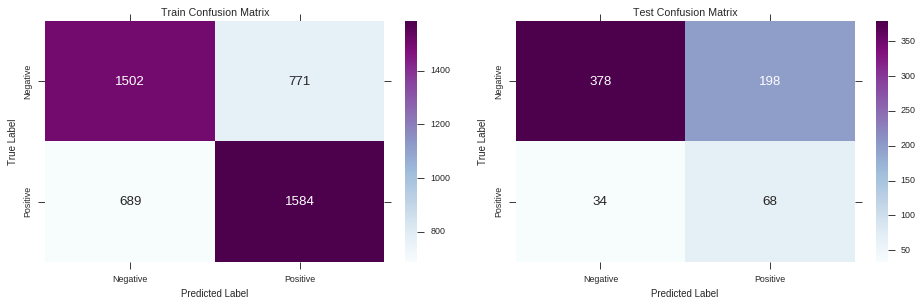


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.685532 | 0.660801 |   0.672939 | 2273        |
| 1.0          |    0.672611 | 0.696876 |   0.684529 | 2273        |
| accuracy     |    0.678839 | 0.678839 |   0.678839 |    0.678839 |
| macro avg    |    0.679072 | 0.678839 |   0.678734 | 4546        |
| weighted avg |    0.679072 | 0.678839 |   0.678734 | 4546        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.917476 | 0.65625  |   0.765182 | 576        |
| 1.0          |    0.255639 | 0.666667 |   0.369565 | 102        |
| accuracy     |    0.657817 | 0.657817 |   0.657817 |   0.657817 |
| macro avg    |    0.586557 | 0.661458 |   0.567374 | 678        |
| weighted avg |    0.817907 | 0.657817 |   0.7056

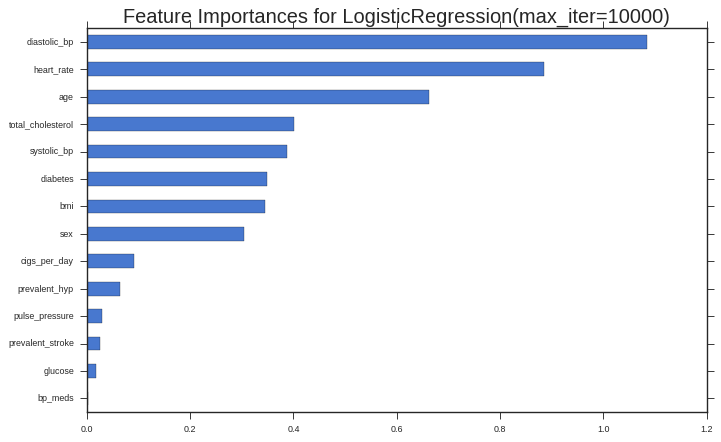

In [ ]:
lr_score = evaluate_model(lr_model, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.679072
Precision Test,0.817907
Recall Train,0.678839
Recall Test,0.657817
Accuracy Train,0.678839
Accuracy Test,0.657817
ROC-AUC Train,0.678839
ROC-AUC Test,0.661458
F1 macro Train,0.678734
F1 macro Test,0.705665


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(X_smote, y_smote)

best_params = grid.best_params_
# The best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Train ROC AUC: 0.6777386713594369
Test ROC AUC: 0.6588541666666666


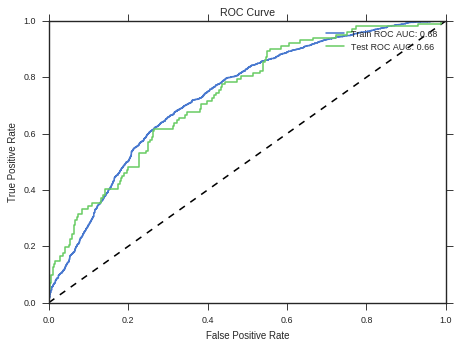


Confusion Matrix:


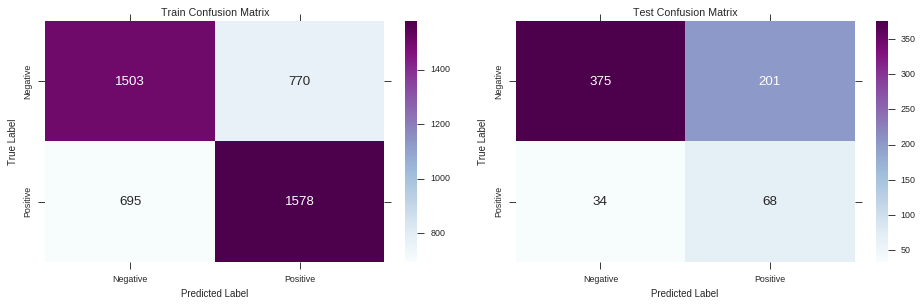


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.683803 | 0.661241 |   0.672333 | 2273        |
| 1.0          |    0.672061 | 0.694237 |   0.682969 | 2273        |
| accuracy     |    0.677739 | 0.677739 |   0.677739 |    0.677739 |
| macro avg    |    0.677932 | 0.677739 |   0.677651 | 4546        |
| weighted avg |    0.677932 | 0.677739 |   0.677651 | 4546        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.91687  | 0.651042 |   0.761421 | 576        |
| 1.0          |    0.252788 | 0.666667 |   0.366577 | 102        |
| accuracy     |    0.653392 | 0.653392 |   0.653392 |   0.653392 |
| macro avg    |    0.584829 | 0.658854 |   0.563999 | 678        |
| weighted avg |    0.816964 | 0.653392 |   0.7020

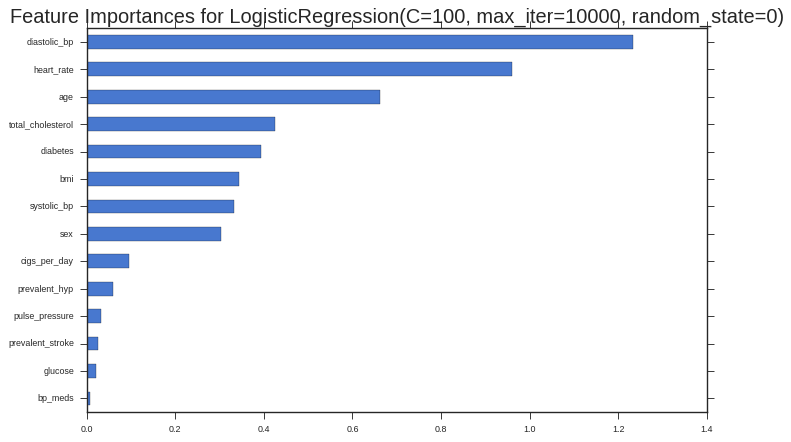

In [ ]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Logistic regression tuned'] = lr_score2
score

,Logistic regression,Logistic regression tuned
Precision Train,0.679072,0.677932
Precision Test,0.817907,0.816964
Recall Train,0.678839,0.677739
Recall Test,0.657817,0.653392
Accuracy Train,0.678839,0.677739
Accuracy Test,0.657817,0.653392
ROC-AUC Train,0.678839,0.677739
ROC-AUC Test,0.661458,0.658854
F1 macro Train,0.678734,0.677651
F1 macro Test,0.705665,0.702020


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

,Logistic regression,Logistic regression tuned
Precision Train,0.679072,0.677932
Precision Test,0.817907,0.816964
Recall Train,0.678839,0.677739
Recall Test,0.657817,0.653392
Accuracy Train,0.678839,0.677739
Accuracy Test,0.657817,0.653392
ROC-AUC Train,0.678839,0.677739
ROC-AUC Test,0.661458,0.658854
F1 macro Train,0.678734,0.677651
F1 macro Test,0.705665,0.702020


It appears that hyperparameter tuning did not improve the performance of the Logistic Regression model on the test set. The precision, recall, accuracy, ROC-AUC, and F1 scores on the test set are the same for both the untuned and tuned Logistic Regression models.

### ML Model - 2

##**Decision Tree**

In [ ]:
# ML Model - 2 Implementation
dt = DecisionTreeClassifier(random_state=0)


Train ROC AUC: 1.0
Test ROC AUC: 0.548968545751634


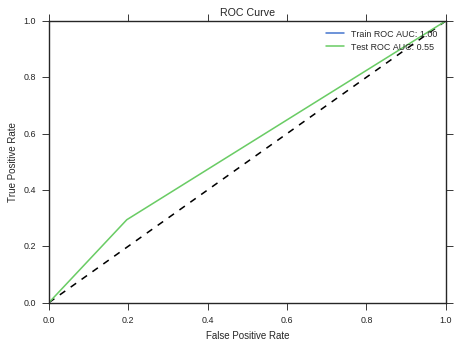


Confusion Matrix:


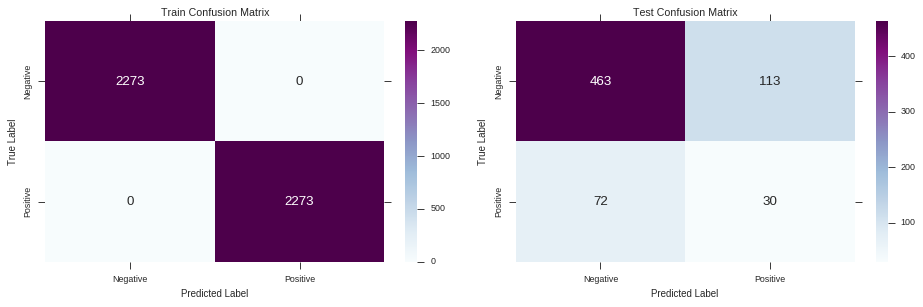


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2273 |
| 1.0          |           1 |        1 |          1 |      2273 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4546 |
| weighted avg |           1 |        1 |          1 |      4546 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.865421 | 0.803819 |   0.833483 | 576        |
| 1.0          |    0.20979  | 0.294118 |   0.244898 | 102        |
| accuracy     |    0.727139 | 0.727139 |   0.727139 |   0.727139 |
| macro avg    |    0.537605 | 0.548969 |   0.539191 | 678        |
| weighted avg |    0.766786 | 0.727139 |   0.744935 | 678      

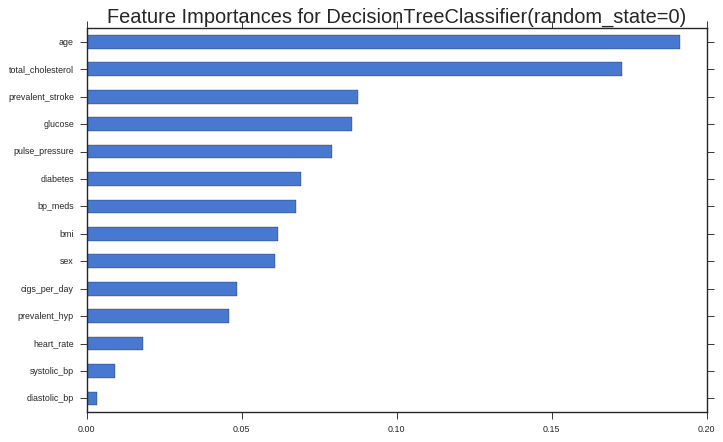

In [ ]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Decision Tree'] = dt_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.679072,0.677932,1.000000
Precision Test,0.817907,0.816964,0.766786
Recall Train,0.678839,0.677739,1.000000
Recall Test,0.657817,0.653392,0.727139
Accuracy Train,0.678839,0.677739,1.000000
Accuracy Test,0.657817,0.653392,0.727139
ROC-AUC Train,0.678839,0.677739,1.000000
ROC-AUC Test,0.661458,0.658854,0.548969
F1 macro Train,0.678734,0.677651,1.000000
F1 macro Test,0.705665,0.702020,0.744935


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = grid_search.best_params_
best_params

{'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 4}

In [ ]:
# Train a new model with the best hyperparameters
dt2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Train ROC AUC: 0.8374395072591289
Test ROC AUC: 0.6067197712418301


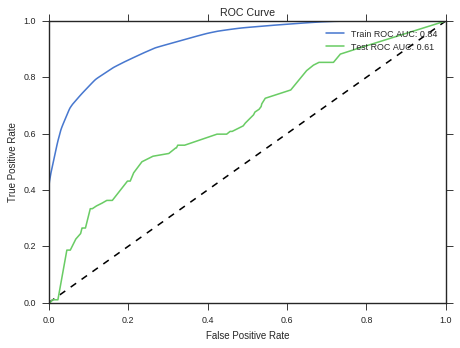


Confusion Matrix:


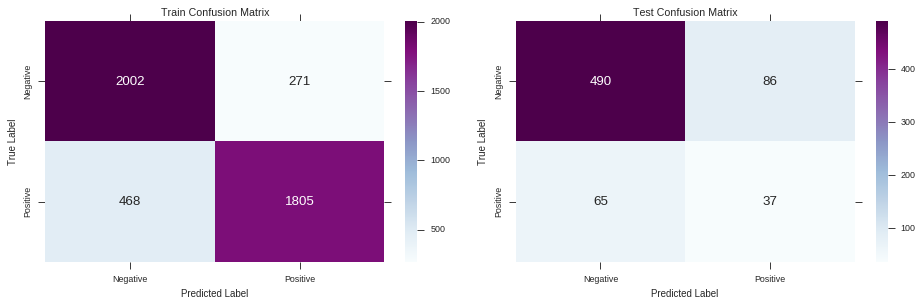


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.810526 | 0.880774 |   0.844191 | 2273       |
| 1.0          |    0.869461 | 0.794105 |   0.830076 | 2273       |
| accuracy     |    0.83744  | 0.83744  |   0.83744  |    0.83744 |
| macro avg    |    0.839993 | 0.83744  |   0.837134 | 4546       |
| weighted avg |    0.839993 | 0.83744  |   0.837134 | 4546       |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.882883 | 0.850694 |   0.86649  | 576        |
| 1.0          |    0.300813 | 0.362745 |   0.328889 | 102        |
| accuracy     |    0.777286 | 0.777286 |   0.777286 |   0.777286 |
| macro avg    |    0.591848 | 0.60672  |   0.597689 | 678        |
| weighted avg |    0.795315 | 0.777286 |   0.785612 | 67

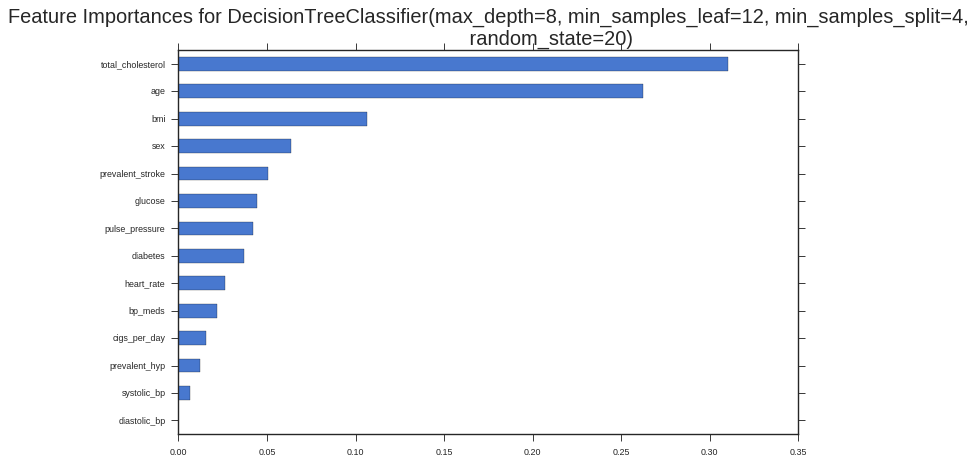

In [ ]:
dt2_score = evaluate_model(dt2, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Decision Tree tuned'] = dt2_score

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.679072,0.677932,1.000000,0.839993
Precision Test,0.817907,0.816964,0.766786,0.795315
Recall Train,0.678839,0.677739,1.000000,0.837440
Recall Test,0.657817,0.653392,0.727139,0.777286
Accuracy Train,0.678839,0.677739,1.000000,0.837440
Accuracy Test,0.657817,0.653392,0.727139,0.777286
ROC-AUC Train,0.678839,0.677739,1.000000,0.837440
ROC-AUC Test,0.661458,0.658854,0.548969,0.606720
F1 macro Train,0.678734,0.677651,1.000000,0.837134
F1 macro Test,0.705665,0.702020,0.744935,0.785612


It appears that hyperparameter tuning improved the performance of the Decision Tree model on the test set.Also,the tuned model is not overfitting like the untuned model.

### ML Model - 3

### **Random Forest**

In [ ]:
# ML Model - 3 Implementation
rf = RandomForestClassifier(random_state=0)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 1.0
Test ROC AUC: 0.5984987745098038


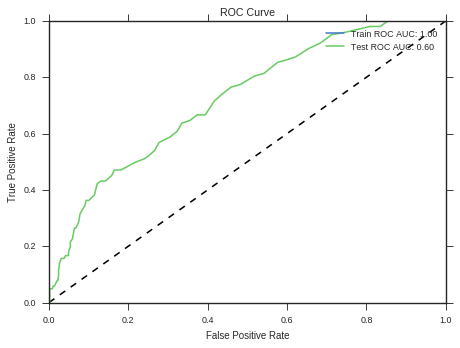


Confusion Matrix:


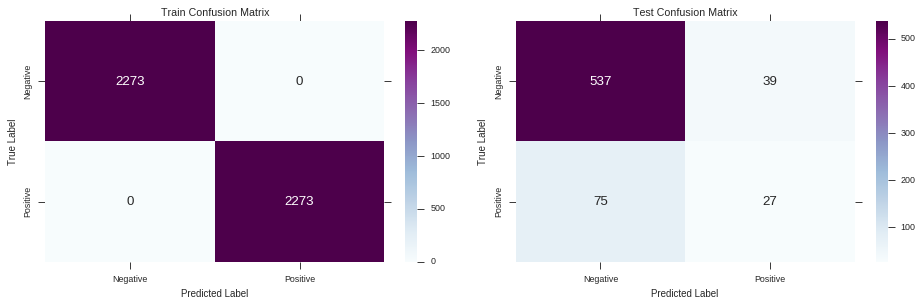


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2273 |
| 1.0          |           1 |        1 |          1 |      2273 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4546 |
| weighted avg |           1 |        1 |          1 |      4546 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.877451 | 0.932292 |   0.90404  | 576        |
| 1.0          |    0.409091 | 0.264706 |   0.321429 | 102        |
| accuracy     |    0.831858 | 0.831858 |   0.831858 |   0.831858 |
| macro avg    |    0.643271 | 0.598499 |   0.612734 | 678        |
| weighted avg |    0.80699  | 0.831858 |   0.816391 | 678      

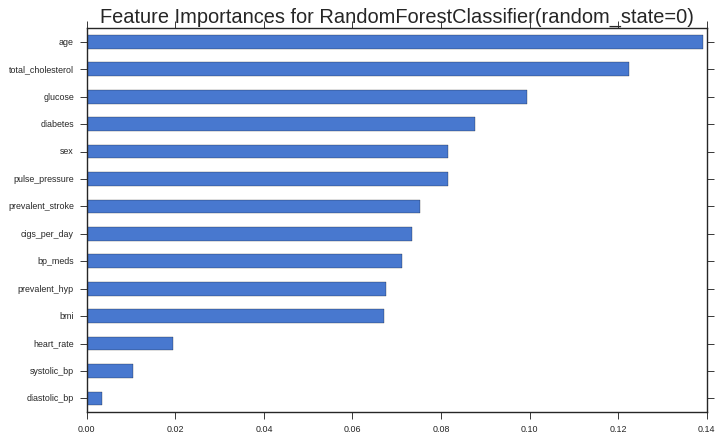

In [ ]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Random Forest'] = rf_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.679072,0.677932,1.000000,0.839993,1.000000
Precision Test,0.817907,0.816964,0.766786,0.795315,0.806990
Recall Train,0.678839,0.677739,1.000000,0.837440,1.000000
Recall Test,0.657817,0.653392,0.727139,0.777286,0.831858
Accuracy Train,0.678839,0.677739,1.000000,0.837440,1.000000
Accuracy Test,0.657817,0.653392,0.727139,0.777286,0.831858
ROC-AUC Train,0.678839,0.677739,1.000000,0.837440,1.000000
ROC-AUC Test,0.661458,0.658854,0.548969,0.606720,0.598499
F1 macro Train,0.678734,0.677651,1.000000,0.837134,1.000000
F1 macro Test,0.705665,0.702020,0.744935,0.785612,0.816391


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the GridSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'n_estimators': 100, 'min_samples_split': 3, 'max_depth': 14}

In [ ]:
# Initialize model with best parameters
rf2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Train ROC AUC: 0.9744830620325561
Test ROC AUC: 0.6099877450980392


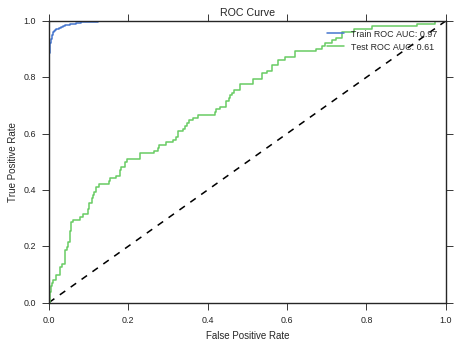


Confusion Matrix:


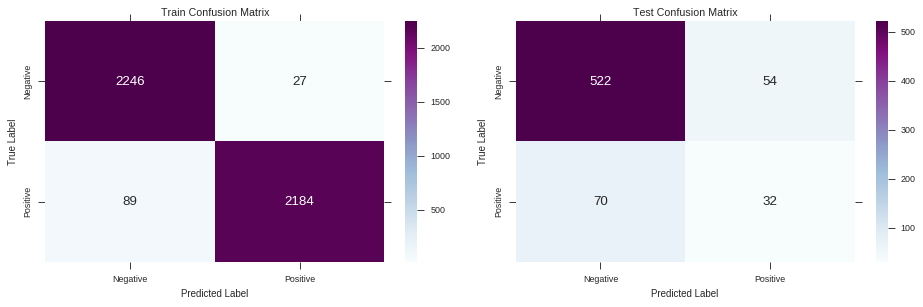


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.961884 | 0.988121 |   0.974826 | 2273        |
| 1.0          |    0.987788 | 0.960845 |   0.97413  | 2273        |
| accuracy     |    0.974483 | 0.974483 |   0.974483 |    0.974483 |
| macro avg    |    0.974836 | 0.974483 |   0.974478 | 4546        |
| weighted avg |    0.974836 | 0.974483 |   0.974478 | 4546        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.881757 | 0.90625  |   0.893836 | 576        |
| 1.0          |    0.372093 | 0.313725 |   0.340426 | 102        |
| accuracy     |    0.817109 | 0.817109 |   0.817109 |   0.817109 |
| macro avg    |    0.626925 | 0.609988 |   0.617131 | 678        |
| weighted avg |    0.805082 | 0.817109 |   0.8105

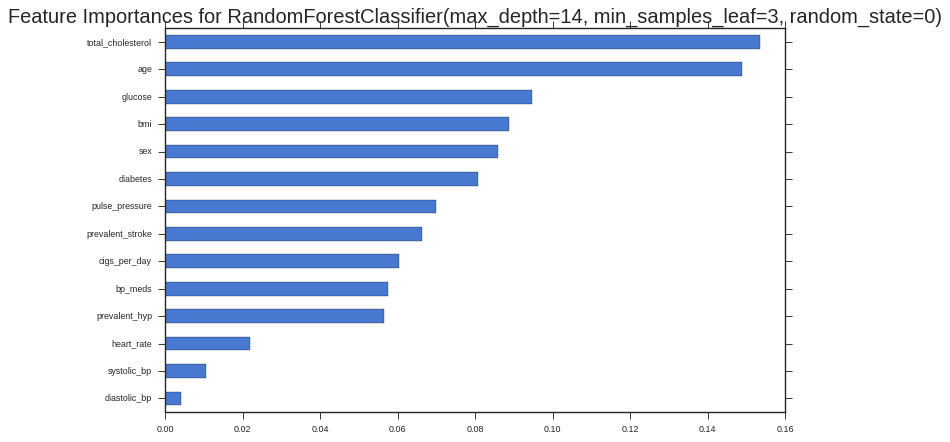

In [ ]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf2, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Random Forest tuned'] = rf2_score

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is RandomizedSearchCV. RandomizedSearchCV is a method that performs a random search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it can be more efficient than exhaustive search methods like GridSearchCV when the parameter space is large.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,0.679072,0.677932,1.000000,0.839993,1.000000,0.974836
Precision Test,0.817907,0.816964,0.766786,0.795315,0.806990,0.805082
Recall Train,0.678839,0.677739,1.000000,0.837440,1.000000,0.974483
Recall Test,0.657817,0.653392,0.727139,0.777286,0.831858,0.817109
Accuracy Train,0.678839,0.677739,1.000000,0.837440,1.000000,0.974483
Accuracy Test,0.657817,0.653392,0.727139,0.777286,0.831858,0.817109
ROC-AUC Train,0.678839,0.677739,1.000000,0.837440,1.000000,0.974483
ROC-AUC Test,0.661458,0.658854,0.548969,0.606720,0.598499,0.609988
F1 macro Train,0.678734,0.677651,1.000000,0.837134,1.000000,0.974478
F1 macro Test,0.705665,0.702020,0.744935,0.785612,0.816391,0.810579


The performance of tuned Random Forest on test set is approximately same as that of untuned ones.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After evaluating the performance of several machine learning models on the Framingham Heart Study dataset, I have selected the Decision Trees as our final prediction model. This decision was based on the model’s performance on our primary evaluation metrics.  

# **Conclusion**

In conclusion, this project effectively utilized machine learning techniques to predict the risk of coronary heart disease (CHD) in patients over a 10-year period. The following key findings emerged:

1. Thorough data preprocessing and transformation greatly enhanced the performance of the machine learning models, resulting in more precise predictions.
2. The selection of relevant features played a critical role in identifying the most significant factors contributing to CHD risk.
3. The Decision Tree model stood out as the optimal choice for prediction due to its exceptional recall score.
4. Various techniques, including SMOTE combined with Tomek links undersampling and standard scalar scaling, were employed to handle imbalanced data and improve the models' performance.
5. This project serves as a compelling example of how machine learning can be effectively applied to real-world scenarios, delivering tangible business benefits.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***